### Adjust plotting for dark theme

In [1]:
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

     |████████████████████████████████| 7.0MB 5.2MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 9.5MB 42.2MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
ERROR: google-colab 1.0.0 has requirement notebook~=5.3.0; python_version >= "3.0", but you'll have notebook 6.1.5 which is incompatible.
  Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1


### Generate dummy data and plot

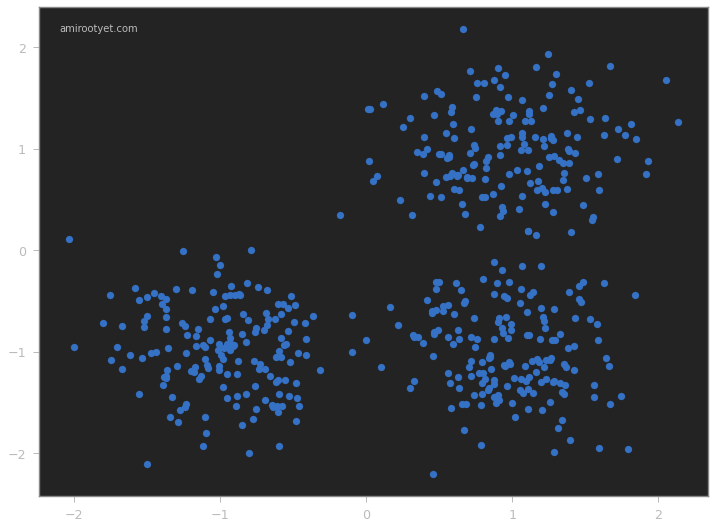

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, y_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=31337)

plt.figure(figsize=(12,9))
plt.annotate('amirootyet.com', xy=(0.03, 0.95), xycoords='axes fraction')
plt.scatter(X[:, 0], X[:, 1], s=50)

### Data scaling

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Determine the optimal number of clusters

Text(0.75, 0.95, 'amirootyet.com')

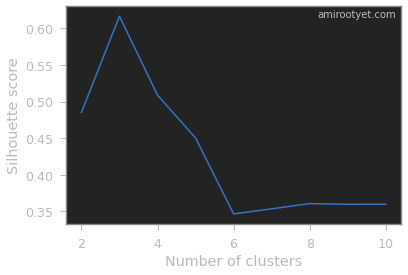

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

scores = []
for K in range(2,11):
  clusterer = KMeans(n_clusters=K, init='k-means++')
  model = clusterer.fit_predict(X)
  score = silhouette_score(X, model)
  scores.append(score)

Ks = [i for i in range(2,11)]
plt.plot(Ks, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.annotate('amirootyet.com', xy=(0.75, 0.95), xycoords='axes fraction')

([<matplotlib.axis.XTick at 0x7f32452e9438>,
 <a list of 10 Text major ticklabel objects>)

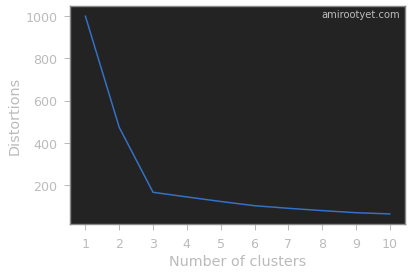

In [5]:
from sklearn.cluster import KMeans

distortions = []
for K in range(1,11):
  clusterer = KMeans(n_clusters=K, init='k-means++')
  model = clusterer.fit(X)
  distortion = model.inertia_
  distortions.append(distortion)

Ks = [i for i in range(1,11)]
plt.plot(Ks, distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.annotate('amirootyet.com', xy=(0.75, 0.95), xycoords='axes fraction')
plt.xticks([i for i in range(1,11)])

In [6]:
from sklearn.cluster import KMeans

classifier = KMeans(n_clusters=3, init='k-means++', random_state=0, n_jobs=-1)
model = classifier.fit(X)

In [7]:
y_pred = model.labels_

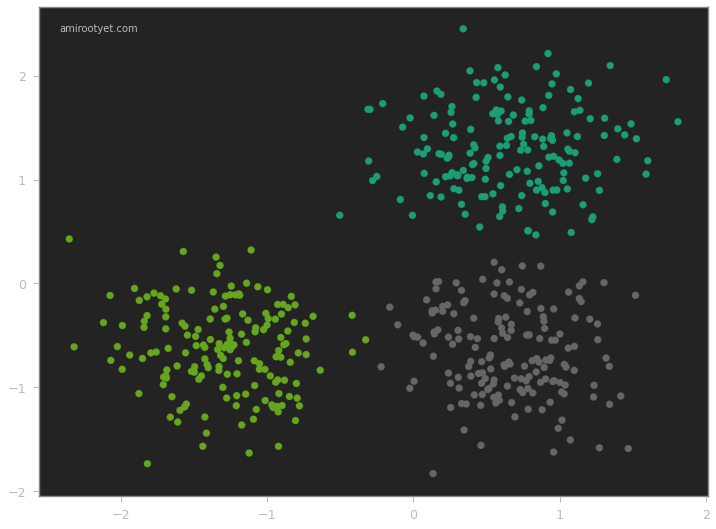

In [8]:
plt.figure(figsize=(12,9))
plt.annotate('amirootyet.com', xy=(0.03, 0.95), xycoords='axes fraction')
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='Dark2')


### Accuracy

In [9]:
from sklearn.metrics import accuracy_score
import numpy as np

print("Accuracy:", accuracy_score(y_true, y_pred))

# uncomment the following to print stacked comparison
# print("Comparison:")
# np.column_stack((y_true, y_pred))



Accuracy: 0.998


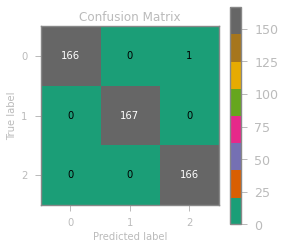

In [10]:
from sklearn.metrics import confusion_matrix
! pip install -q scikit-plot

confusion_matrix(y_true, y_pred)
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_true, 
    y_pred,
    figsize=(4,4), cmap='Dark2')

### Additional links:

 - https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html